In [19]:
import nbsetup
import numpy as np
import seaborn as sns
from models.space import Space
from models import disc

Equations from https://academic.oup.com/mnras/article/414/3/2446/1042117?login=true#m1

In [20]:
def buldge(R, z, p0=9.93, q=0.5, rcut=2.1, r0=0.075, alpha=1.8):
    rprime = (R**2+(z/q)**2)**0.5
    exponent = np.exp(-(rprime/rcut)**2)
    return p0*exponent/((1+rprime/r0)**alpha)

def disk(R, z, zd, sig0, Rd):
    exponent = np.exp((-np.abs(z)/zd)-(R/Rd))
    return sig0*exponent/(2*zd)
    
def thick(R,z):
    return disk(R, z, zd=900, sig0=209.5, Rd=3.31)

def thin(R,z):
    return disk(R, z, zd=300, sig0=816.6, Rd=2.9)

<AxesSubplot:>

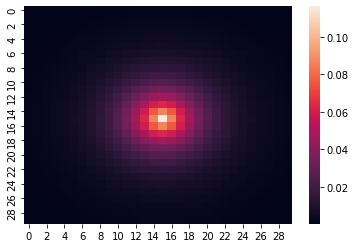

In [23]:
flattened_thick = disc.generate(30, lambda r: thick(r,1))
sns.heatmap(flattened_thick)

<AxesSubplot:>

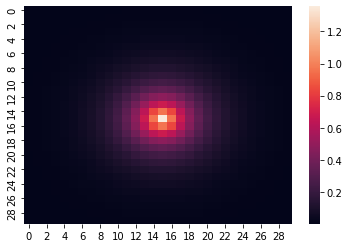

In [24]:
flattened_thin = disc.generate(30, lambda r: thin(r,1))
sns.heatmap(flattened_thin)

<AxesSubplot:>

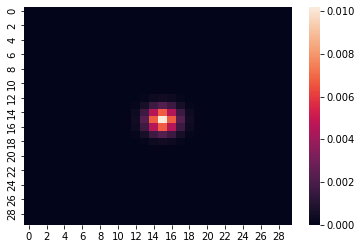

In [25]:
flattened_buldge = disc.generate(30, lambda r: buldge(r,1))
sns.heatmap(flattened_buldge)

In [26]:
milky = Space([flattened_thick, flattened_thin, flattened_buldge])

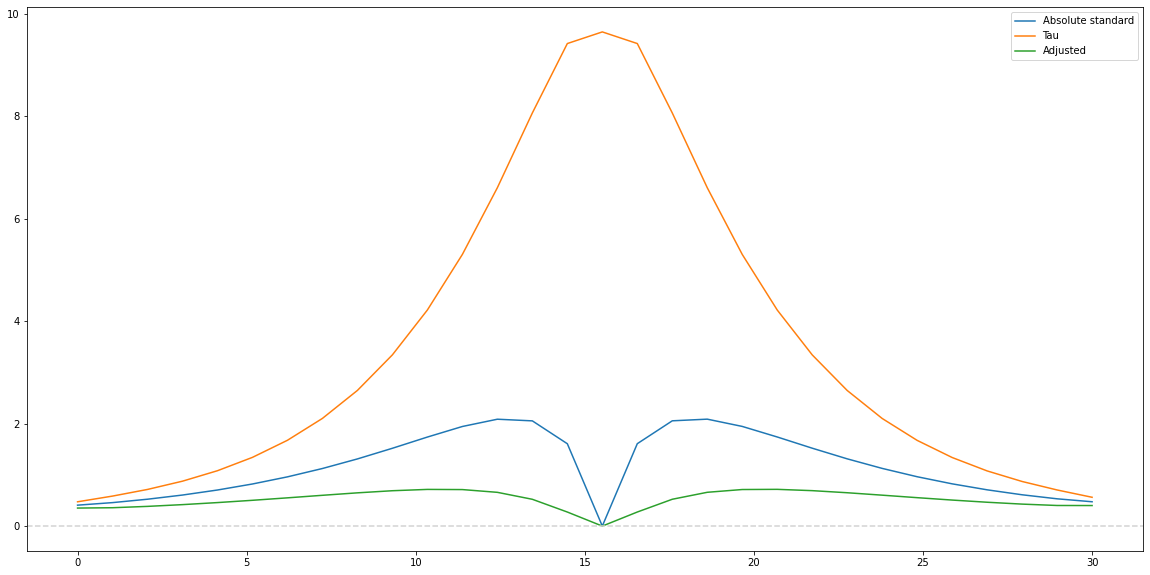

In [27]:
milky.line()

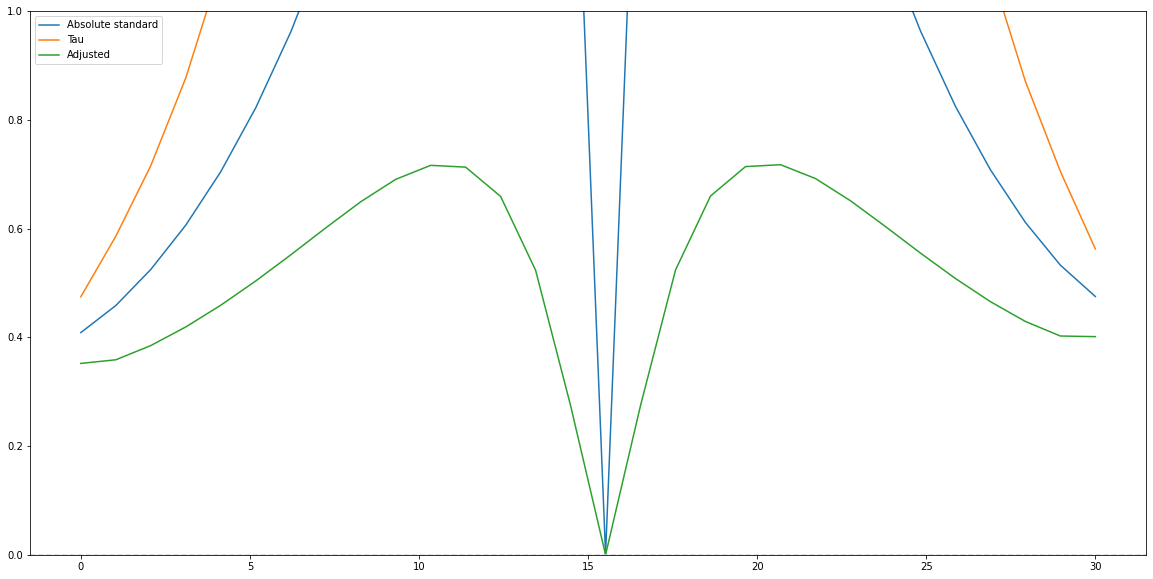

In [28]:
milky.line(ylim=(0,1))

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
def velocities(self, position=None, ylim=(None, None)):
    """ Plots a specific line across the 2D Space """
    if position is None: position = int(len(self.coord_y)/2)
    
    plt.figure(figsize=(20,10))
    
    standard = np.abs(self.fields['gx'][position])
    tau = self.fields['abs'][position]
    external = tau - standard
    
    data = {}
    data['standard velocity'] = standard**0.5
    data['adjusted velocity'] = (10*standard/(1+external/standard)**2)**0.5
    data['expo velocity'] = (standard/np.exp(external))**0.5
    
    for k,v in data.items():
        g = sns.lineplot(x=self.coord_x, y=v, label=k)
    
    g.set(ylim=ylim)
    #g.axhline(0, ls='--', color='lightgrey')

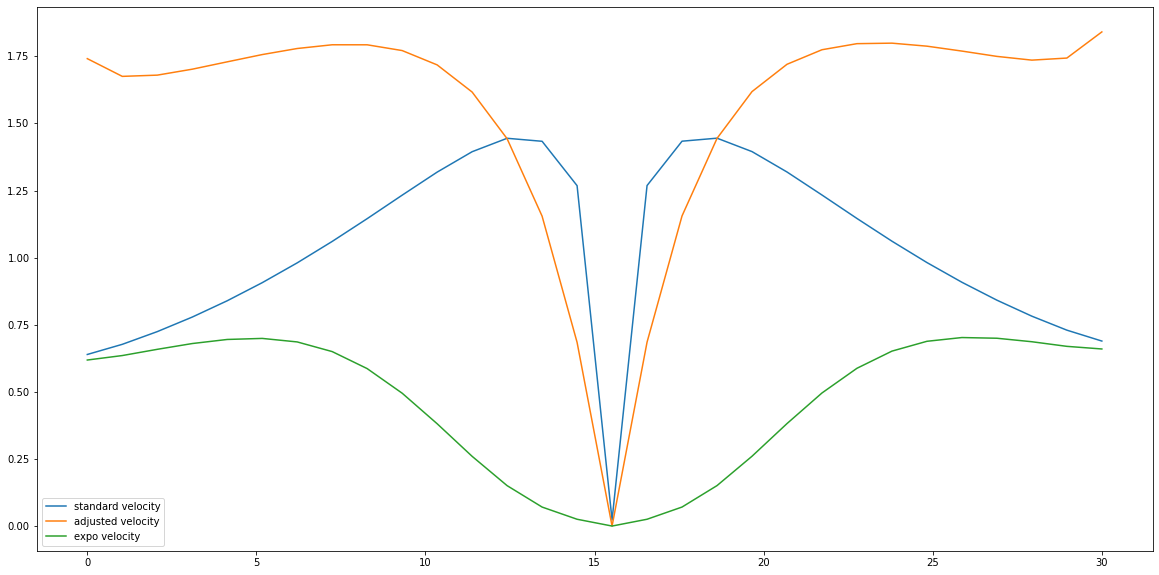

In [78]:
velocities(milky)

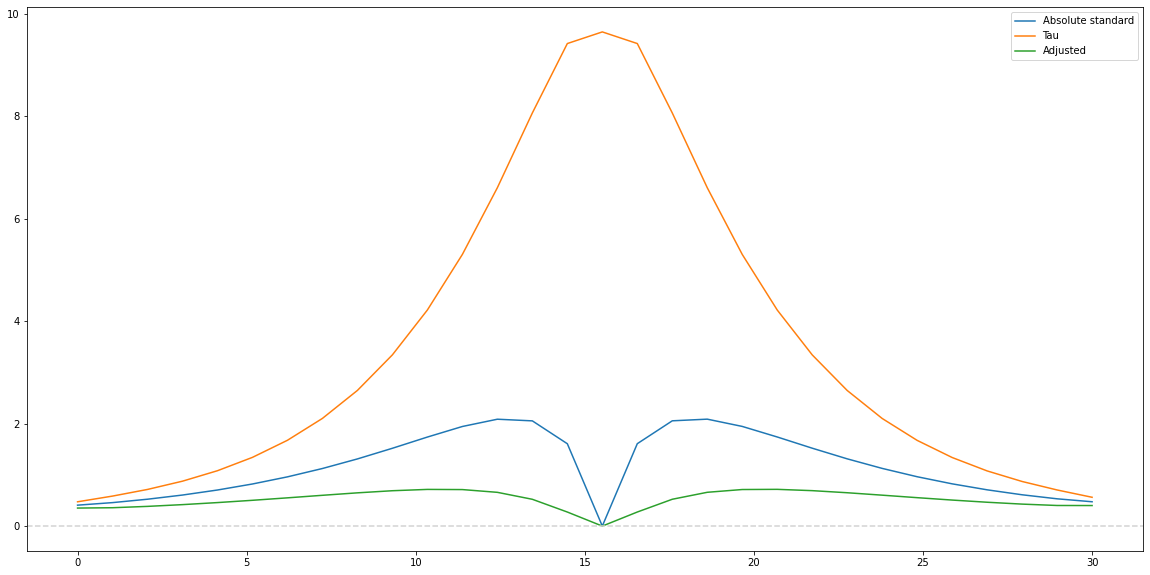

In [69]:
milky.line()